In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
# Load diabetes dataset
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# Decode admission_type_id
admission_type_dict = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: np.nan,
    7: 'Trauma Center',
    8: 'Not Mapped'
}
data['admission_type_id'] = data['admission_type_id'].map(admission_type_dict)


In [5]:
discharge_disposition_dict={
    1:'Discharged to home',
    2:'Discharged/transferred to another short term hospital',
    3:'Discharged/transferred to SNF',
    4:'Discharged/transferred to ICF',
    5:'Discharged/transferred to another type of inpatient care institution',
    6:'Discharged/transferred to home with home health service',
    7:'Left AMA',
    8:'Discharged/transferred to home under care of Home IV provider',
    9:'Admitted as an inpatient to this hospital',
    10:'Neonate discharged to another hospital for neonatal aftercare',
    11:'Expired',
    12:'Still patient or expected to return for outpatient services',
    13:'Hospice / home',
    14:'Hospice / medical facility',
    15:'Discharged/transferred within this institution to Medicare approved swing bed',
    16:'Discharged/transferred/referred another institution for outpatient services',
    17:'Discharged/transferred/referred to this institution for outpatient services',
    18:np.nan,
    19:'Expired at home. Medicaid only, hospice.',
    20:'Expired in a medical facility. Medicaid only, hospice.',
    21:'Expired, place unknown. Medicaid only, hospice.',
    22:'Discharged/transferred to another rehab fac including rehab units of a hospital .',
    23:'Discharged/transferred to a long term care hospital.',
    24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25:'Not Mapped',
    26:'Unknown/Invalid',
    30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    27:'Discharged/transferred to a federal health care facility.',
    28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29:'Discharged/transferred to a Critical Access Hospital (CAH).',
}
data['discharge_disposition_id']  = data['discharge_disposition_id'].map(discharge_disposition_dict)

In [6]:
# Decode admission_source_id
admission_source_dict={
    1:'Physician Referral',
    2:'Clinic Referral',
    3:'HMO Referral',
    4:'Transfer from a hospital',
    5:'Transfer from a Skilled Nursing Facility (SNF)',
    6:'Transfer from another health care facility',
    7:'Emergency Room',
    8:'Court/Law Enforcement',
    9:'Not Available',
    10:'Transfer from critial access hospital',
    11:'Normal Delivery',
    12:'Premature Delivery',
    13:'Sick Baby',
    14:'Extramural Birth',
    15:'Not Available',
    17:np.nan,
    18:'Transfer From Another Home Health Agency',
    19:'Readmission to Same Home Health Agency',
    20:'Not Mapped',
    21:'Unknown/Invalid',
    22:'Transfer from hospital inpt/same fac reslt in a sep claim',
    23:'Born inside this hospital',
    24:'Born outside this hospital',
    25:'Transfer from Ambulatory Surgery Center',
    26:'Transfer from Hospice',
}
data['admission_source_id'] = data['admission_source_id'].map(admission_source_dict)

In [7]:
# Display decoded categorical fields
data[['admission_type_id','discharge_disposition_id','admission_source_id']]


,admission_type_id,discharge_disposition_id,admission_source_id
0,NaN,Not Mapped,Physician Referral
1,Emergency,Discharged to home,Emergency Room
2,Emergency,Discharged to home,Emergency Room
3,Emergency,Discharged to home,Emergency Room
4,Emergency,Discharged to home,Emergency Room
...,...,...,...
101761,Emergency,Discharged/transferred to SNF,Emergency Room
101762,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,Emergency,Discharged to home,Emergency Room
101764,Urgent,Discharged/transferred to SNF,Emergency Room


In [8]:
# Replace '?' with NaN values
data.replace('?',np.nan,inplace=True)

In [9]:
# Drop columns with excessive missing values or irrelevant for modeling
data.drop(columns=['weight', 'encounter_id', 'patient_nbr'], inplace=True)

In [10]:
# Remove rows with missing primary diagnosis (critical field)
data.dropna(subset=['diag_1'], inplace=True)

In [11]:
# Display count of null values in each column
print(data.isnull().sum())

race                         2271
gender                          0
age                             0
admission_type_id            5290
discharge_disposition_id     3690
admission_source_id          6780
time_in_hospital                0
payer_code                  40245
medical_specialty           49941
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                        357
diag_3                       1422
number_diagnoses                0
max_glu_serum               96400
A1Cresult                   84730
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [12]:
'''# Map readmitted for binary classification
map_readmitted = {
    'NO': 0,
    '<30': 1,
    '>30': 0
}
data['readmitted'] = data['readmitted'].map(map_readmitted) '''

"# Map readmitted for binary classification\nmap_readmitted = {\n    'NO': 0,\n    '<30': 1,\n    '>30': 0\n}\ndata['readmitted'] = data['readmitted'].map(map_readmitted) "

In [13]:
# Handle missing values for each column
data['race'] = data['race'].fillna(data['race'].mode()[0])  # Fill with mode
data['A1Cresult'] = data['A1Cresult'].fillna('not measured')  # Medical test results
data['max_glu_serum'] = data['max_glu_serum'].fillna('not measured')
data['payer_code'] = data['payer_code'].fillna('unknown')
data['medical_specialty'] = data['medical_specialty'].fillna('unknown')
data['diag_2'] = data['diag_2'].fillna("NO_SECONDARY_DX")  # Secondary diagnosis
data['diag_3'] = data['diag_3'].fillna("NO_TERTIARY_DX")  # Tertiary diagnosis
data['admission_type_id'] = data['admission_type_id'].fillna('Not Available')
data['discharge_disposition_id'] = data['discharge_disposition_id'].fillna('Not Available')
data['admission_source_id'] = data['admission_source_id'].fillna('Not Available')
payer_data = data[['payer_code', 'readmitted']].copy()

In [14]:

# Verify all nulls are handle
data.isnull().sum()


race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [15]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Mapped,Physician Referral,1,unknown,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,unknown,unknown,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,unknown,unknown,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,unknown,unknown,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,unknown,unknown,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Key Findings from Exploratory Data Analysis

### Readmission percentage 

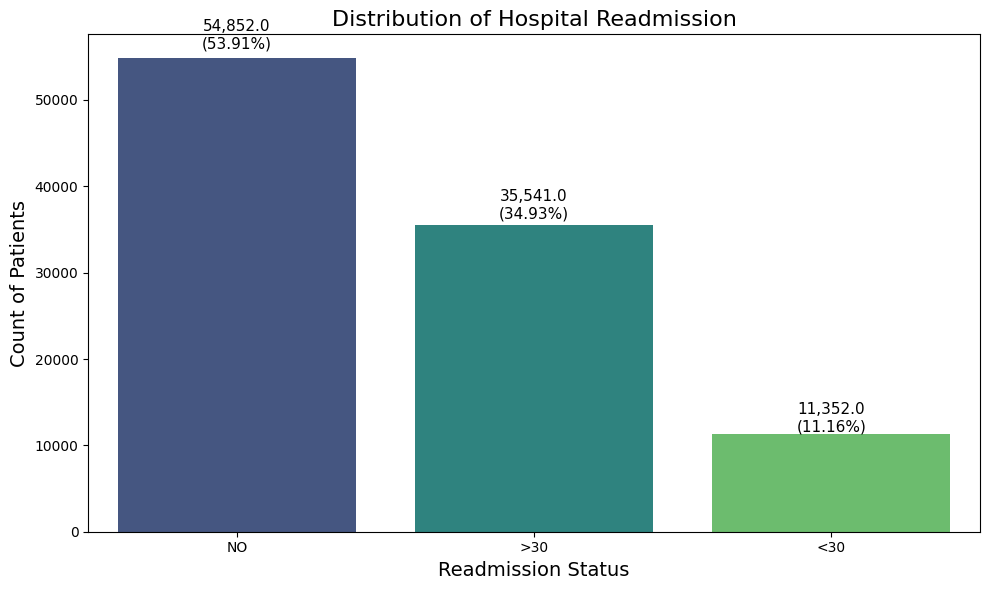

In [16]:
data['readmitted_binary'] = (data['readmitted'] == '<30').astype(int)

# Analyzing the target variable 'readmitted'
readmitted_counts = data['readmitted'].value_counts()
readmitted_percent = (data['readmitted'].value_counts(normalize=True) * 100).round(2)

# Summary dataframe
readmission_summary = pd.DataFrame({
    'Count': readmitted_counts,
    'Percentage (%)': readmitted_percent
})


# visual representation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='readmitted', data=data, hue='readmitted', palette='viridis', legend=False)
# Adding count and percentage labels to the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = readmitted_percent.iloc[i] if i < len(readmitted_percent) else 0
    ax.annotate(f"{height:,}\n({percentage}%)", 
                (p.get_x() + p.get_width() / 2., height * 1.02),
                ha='center', va='baseline', fontsize=11)

plt.title('Distribution of Hospital Readmission', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.tight_layout()
plt.show()



### Age ranges of patients 

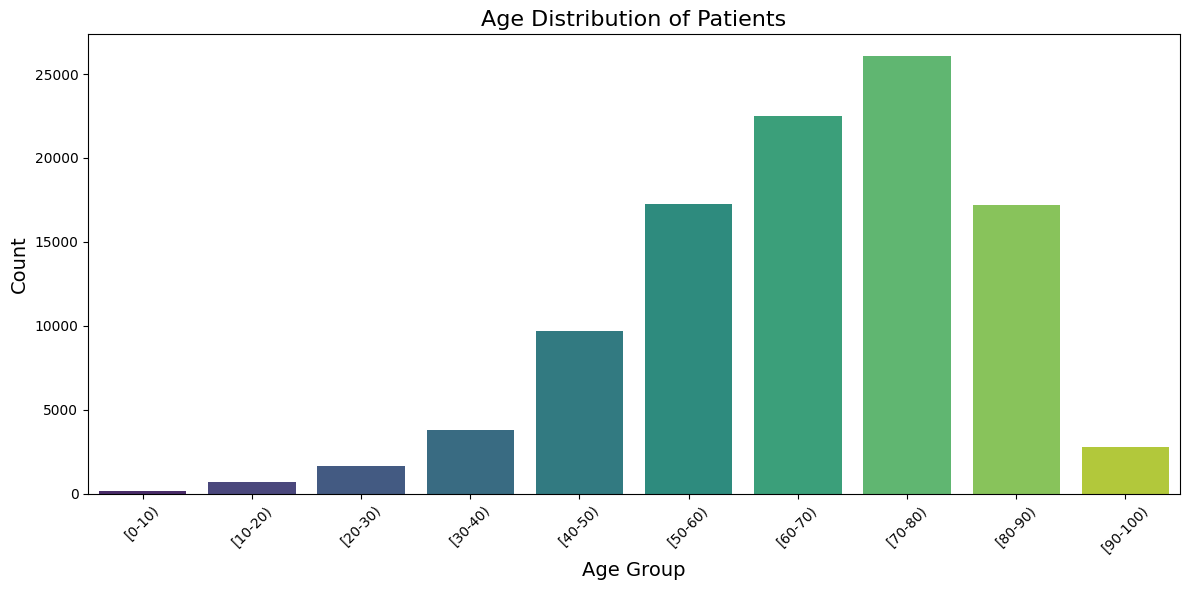

In [17]:
plt.figure(figsize=(12, 6))
age_counts = data['age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='viridis',legend=False )
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender of patients

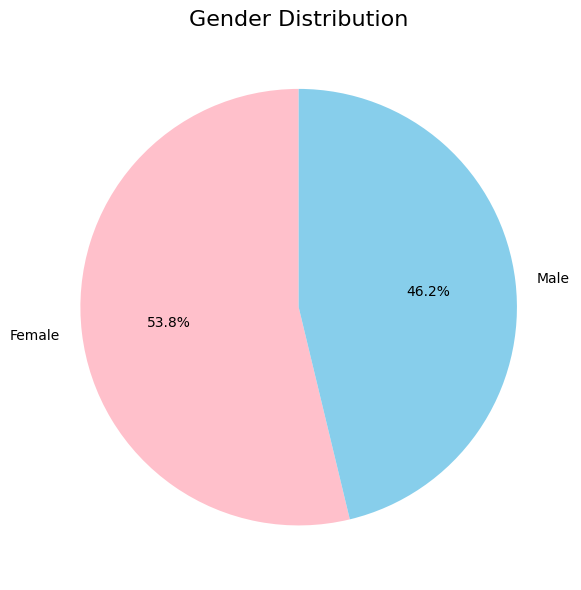

In [18]:
# Analyzing gender distribution
data = data[data['gender'].isin(['Male', 'Female'])]
plt.figure(figsize=(10, 6))
gender_counts = data['gender'].value_counts()
# the different numbers of gender categories handling
#explode = [0.2] + [0] * (len(gender_counts) - 1)  # Explode the first piece (largest)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['pink', 'skyblue', 'lightgreen'][:len(gender_counts)])
plt.title('Gender Distribution', fontsize=16)
plt.tight_layout()
plt.show()


### Race of patients

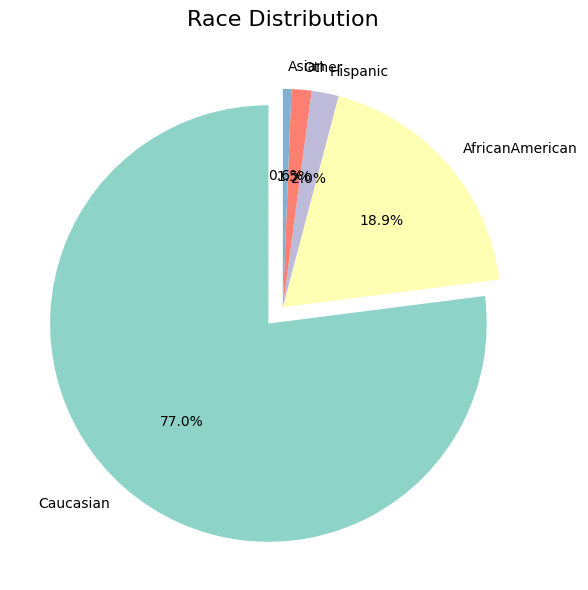

In [19]:
# Analyzing race distribution
plt.figure(figsize=(10, 6))
race_counts = data['race'].value_counts()
explode = [0.1] + [0] * (len(race_counts) - 1)  # Explode the largest piece

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, colors=sns.color_palette('Set3', len(race_counts)))
plt.title('Race Distribution', fontsize=16)
plt.tight_layout()
plt.show()

### Admission types in the hospital 

### Admission types distribution that get readmitted in less than 30 days


In [20]:
# function to calculate readmission rates by category
def calculate_readmission_rate(df, feature):
    """Calculate readmission rates for each category of a feature"""
    # Counting occurrences for each combination of feature and readmission status
    grouped = df.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    
    # Calculating total count for each category
    grouped['total'] = grouped.sum(axis=1)
    
    # Calculating readmission rates
    grouped['<30_days_rate'] = (grouped['<30'] / grouped['total'] * 100).round(2)
    grouped['>30_days_rate'] = (grouped['>30'] / grouped['total'] * 100).round(2)
    grouped['total_readmission_rate'] = ((grouped['<30'] + grouped['>30']) / grouped['total'] * 100).round(2)
    
    # rates and counts
    return grouped[['<30_days_rate', '>30_days_rate', 'total_readmission_rate', 'total']]

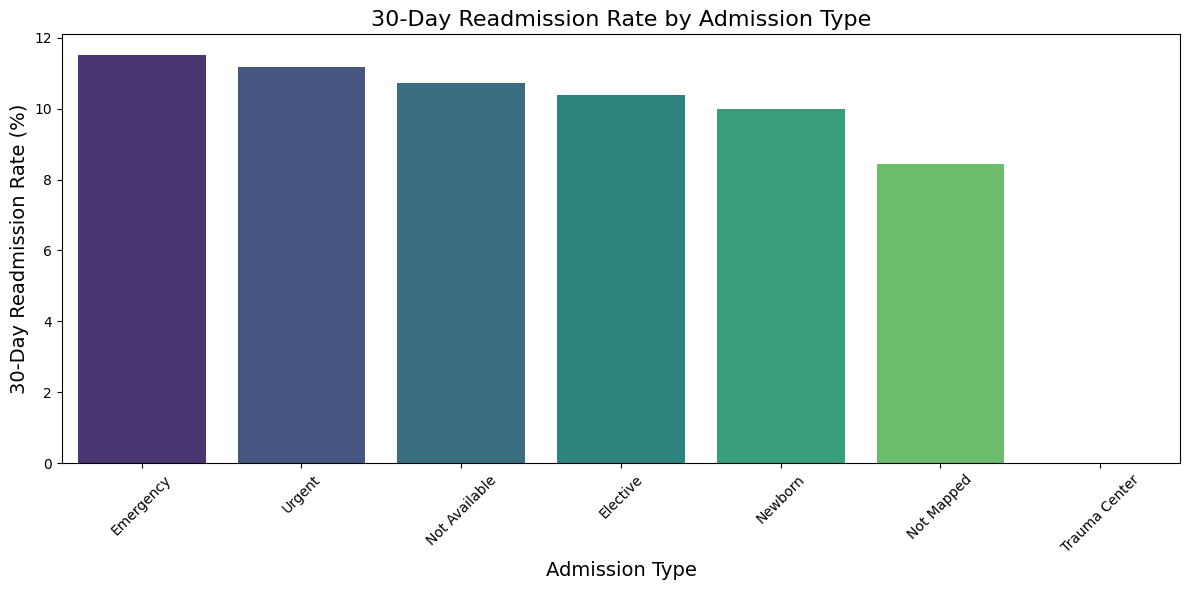

In [21]:
valid_admission = data.dropna(subset=['admission_type_id'])
admission_readmission = calculate_readmission_rate(valid_admission, 'admission_type_id')
admission_readmission = admission_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=admission_readmission.index, y=admission_readmission['<30_days_rate'],hue=admission_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Admission Type', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Readmission rates by admission source


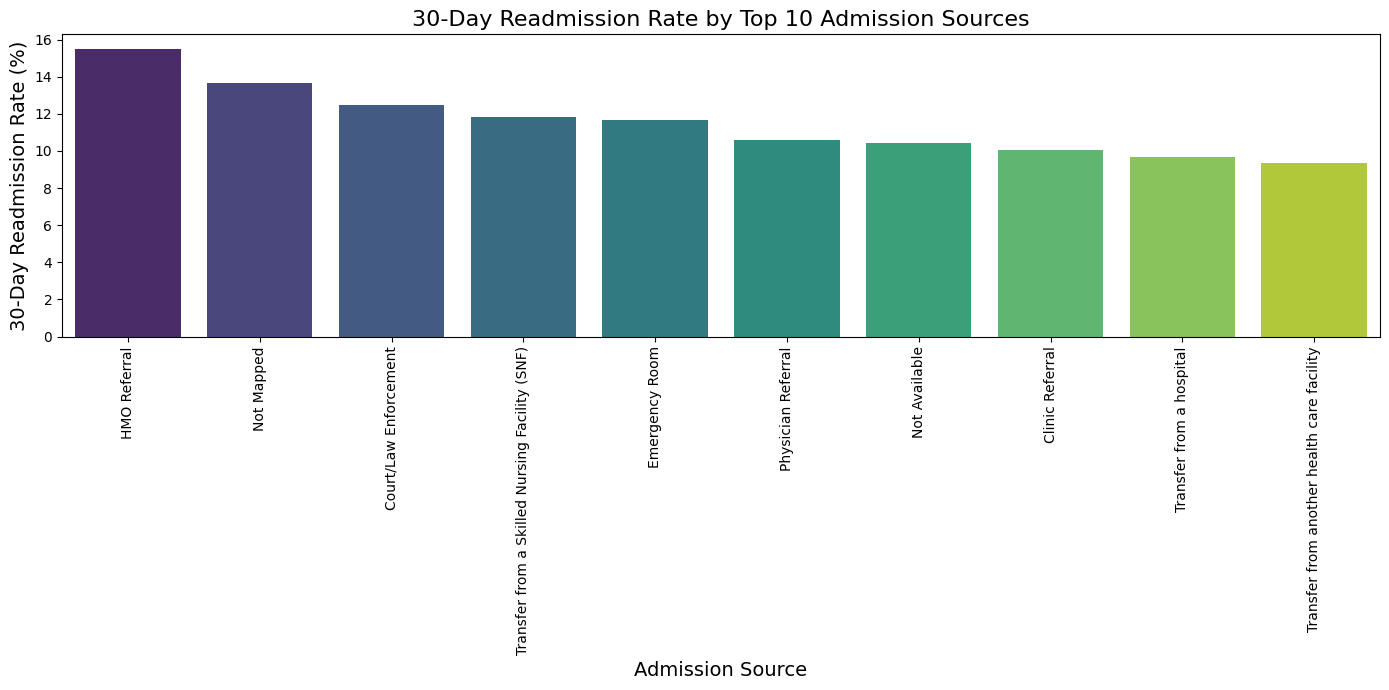

In [22]:
top_sources = data['admission_source_id'].value_counts().nlargest(10).index
source_data = data[data['admission_source_id'].isin(top_sources)]
source_readmission = calculate_readmission_rate(source_data, 'admission_source_id')
source_readmission = source_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=source_readmission.index, y=source_readmission['<30_days_rate'], hue=source_readmission.index,palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Top 10 Admission Sources', fontsize=16)
plt.xlabel('Admission Source', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Seeing the relation between the diagnosis 1 with the readmission before 30 days

In [23]:
def categorize_diagnosis(code):
    if pd.isna(code):  # Handle missing values
        return "Unknown"

    code = str(code).strip()  # Ensure it's a string and remove spaces
    
    # Check if it's a numeric ICD code
    if code.replace(".", "").isdigit():
        code = float(code)  # Convert to float
        if 1 <= code <= 139:
            return "Infectious Diseases"
        elif 140 <= code <= 239:
            return "Cancer & Neoplasms"
        elif 240 <= code <= 279:
            return "Endocrine Disorders"
        elif 280 <= code <= 289:
            return "Blood Disorders"
        elif 290 <= code <= 319:
            return "Mental Health Disorders"
        elif 320 <= code <= 389:
            return "Nervous System Diseases"
        elif 390 <= code <= 459:
            return "Heart & Circulatory Conditions"
        elif 460 <= code <= 519:
            return "Respiratory Diseases"
        elif 520 <= code <= 579:
            return "Digestive System Diseases"
        elif 580 <= code <= 629:
            return "Kidney & Urinary Disorders"
        elif 630 <= code <= 679:
            return "Pregnancy-Related Conditions"
        elif 680 <= code <= 709:
            return "Skin Disorders"
        elif 710 <= code <= 739:
            return "Muscle & Bone Conditions"
        elif 740 <= code <= 759:
            return "Congenital Disorders"
        elif 760 <= code <= 779:
            return "Perinatal Conditions"
        elif 780 <= code <= 799:
            return "Symptoms & Non-Specific Conditions"
        elif 800 <= code <= 999:
            return "Injuries & Poisoning"
        else:
            return "Unknown ICD Code"

    # If it's an alphanumeric V, W, X, or Y code
    elif code.startswith("V"):
        return "External Injury (Vehicle-related)"
    elif code.startswith("W"):
        return "External Injury (Falls, Accidents)"
    elif code.startswith("X"):
        return "External Injury (Poisoning, Assault)"
    elif code.startswith("Y"):
        return "External Injury (Other Causes)"
    else:
        return "Unknown"

# Apply function to the dataset
data["diag_category"] = data["diag_1"].apply(categorize_diagnosis)

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_13528\1102450963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diag_readmission.index, y=diag_readmission['<30_days_rate'], palette='viridis', legend=False)


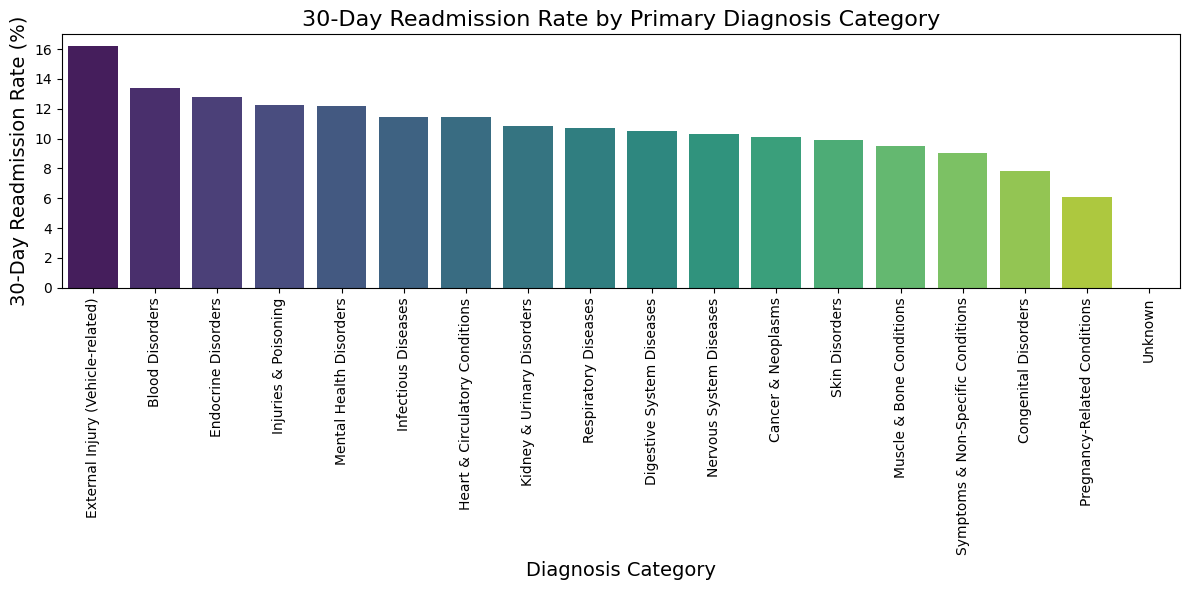

In [24]:
# Calculating readmission rates by primary diagnosis category
diag_readmission = calculate_readmission_rate(data, 'diag_category')
diag_readmission = diag_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=diag_readmission.index, y=diag_readmission['<30_days_rate'], palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Primary Diagnosis Category', fontsize=16)
plt.xlabel('Diagnosis Category', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Seeing the relation between A1C and readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_13528\3411735104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="A1Cresult", data=filtered_df, palette="viridis")


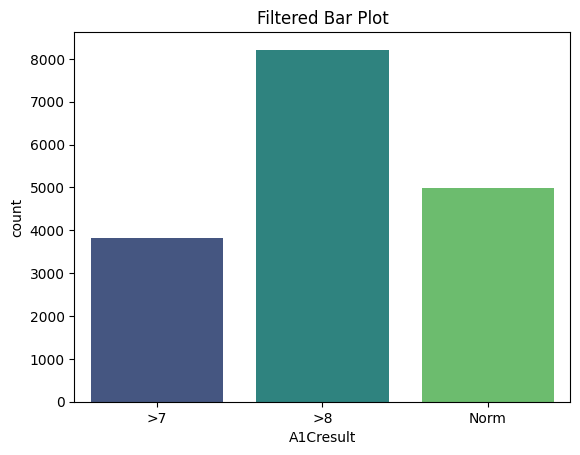

In [25]:

filtered_df = data[data["A1Cresult"] != "not measured"]
a1c_readmission = calculate_readmission_rate(filtered_df, 'A1Cresult')
a1c_readmission = a1c_readmission.sort_values('<30_days_rate', ascending=False)


# Create bar plot
sns.countplot(x="A1Cresult", data=filtered_df, palette="viridis")
plt.xticks(rotation=0) 
plt.title("Filtered Bar Plot")
plt.show()


### Seeing the relation between the glucose serum results and readmission

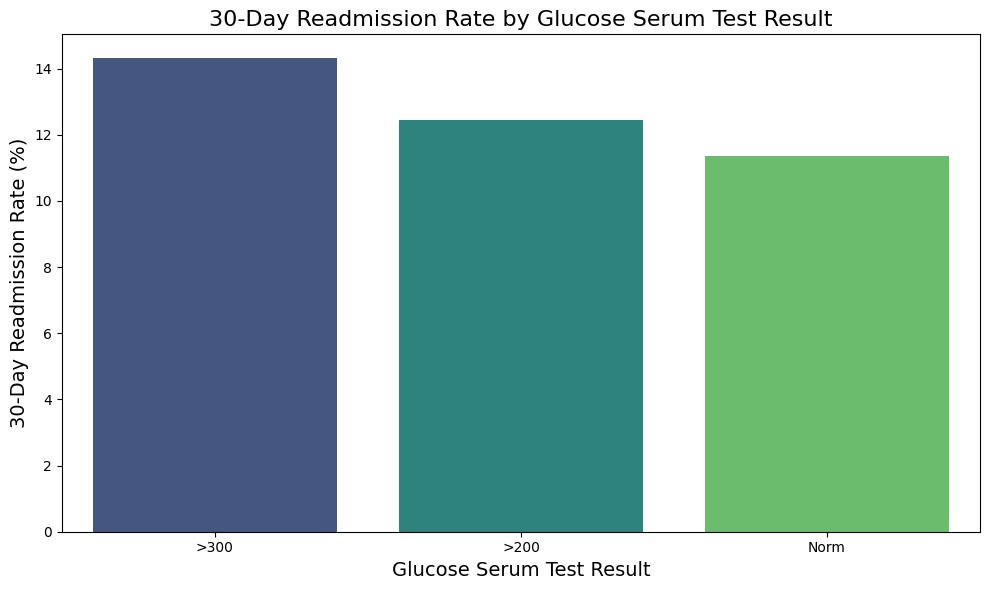

In [26]:
filtered_df = data[data["max_glu_serum"] != "not measured"]
glu_readmission = calculate_readmission_rate(filtered_df, 'max_glu_serum')
glu_readmission = glu_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=glu_readmission.index, y=glu_readmission['<30_days_rate'],hue=glu_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Glucose Serum Test Result', fontsize=16)
plt.xlabel('Glucose Serum Test Result', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()


### Seeing the effect of using a diabetes medication on readmission

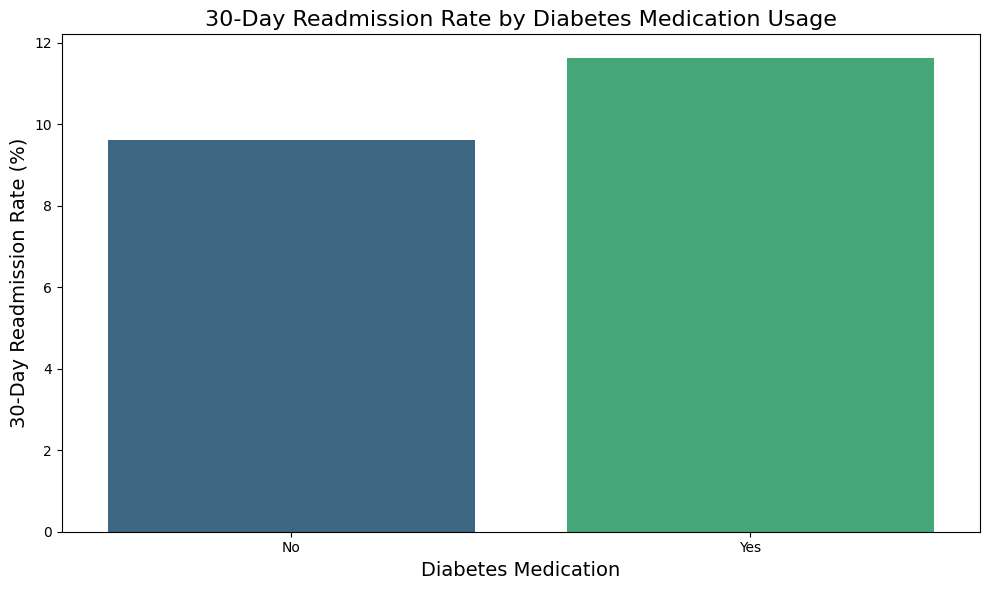

In [27]:
diabetes_med_readmission = calculate_readmission_rate(data, 'diabetesMed')

plt.figure(figsize=(10, 6))
sns.barplot(x=diabetes_med_readmission.index, y=diabetes_med_readmission['<30_days_rate'],hue= diabetes_med_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Diabetes Medication Usage', fontsize=16)
plt.xlabel('Diabetes Medication', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()

plt.show()

### Seeing the effect of changing the medication on readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_13528\724222552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_readmission.index, y=change_readmission['<30_days_rate'], palette='viridis')


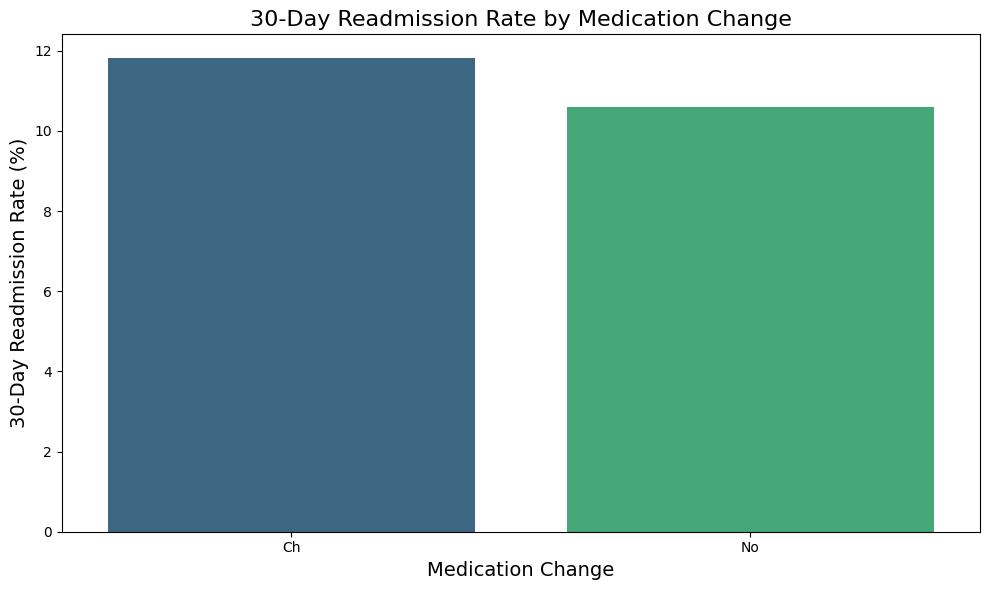

In [28]:
# Calculating readmission rates by medication change
change_readmission = calculate_readmission_rate(data, 'change')

plt.figure(figsize=(10, 6))
sns.barplot(x=change_readmission.index, y=change_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Medication Change', fontsize=16)
plt.xlabel('Medication Change', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

### Seeing the effect of insulin on readmission

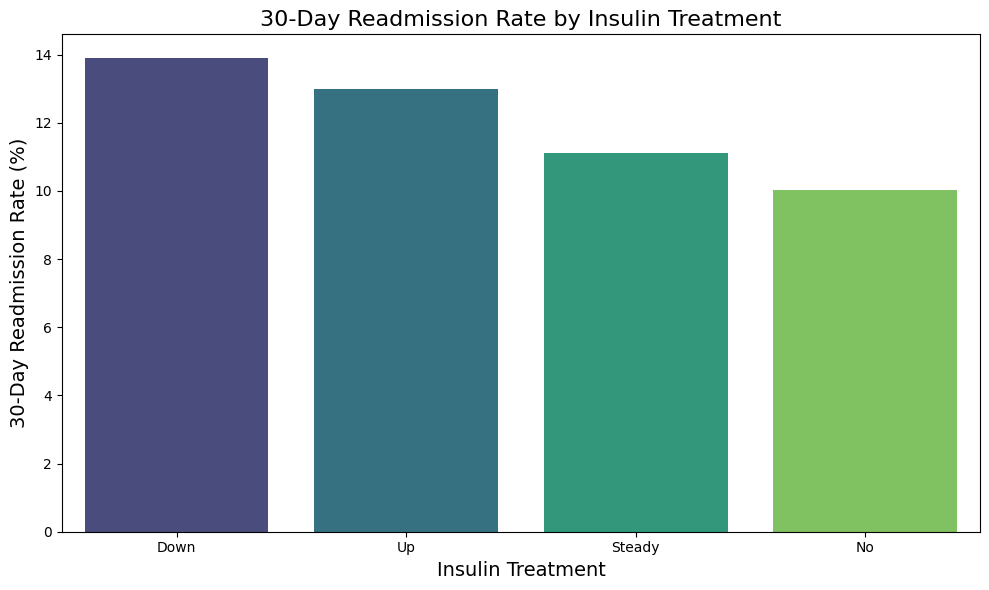

In [29]:
insulin_readmission = calculate_readmission_rate(data, 'insulin')
insulin_readmission = insulin_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=insulin_readmission.index, y=insulin_readmission['<30_days_rate'],hue=insulin_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()


### Seeing the effect of specific medication on readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_13528\4277345776.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medication', y='Readmission_Rate', data=med_rates_df, palette='viridis')


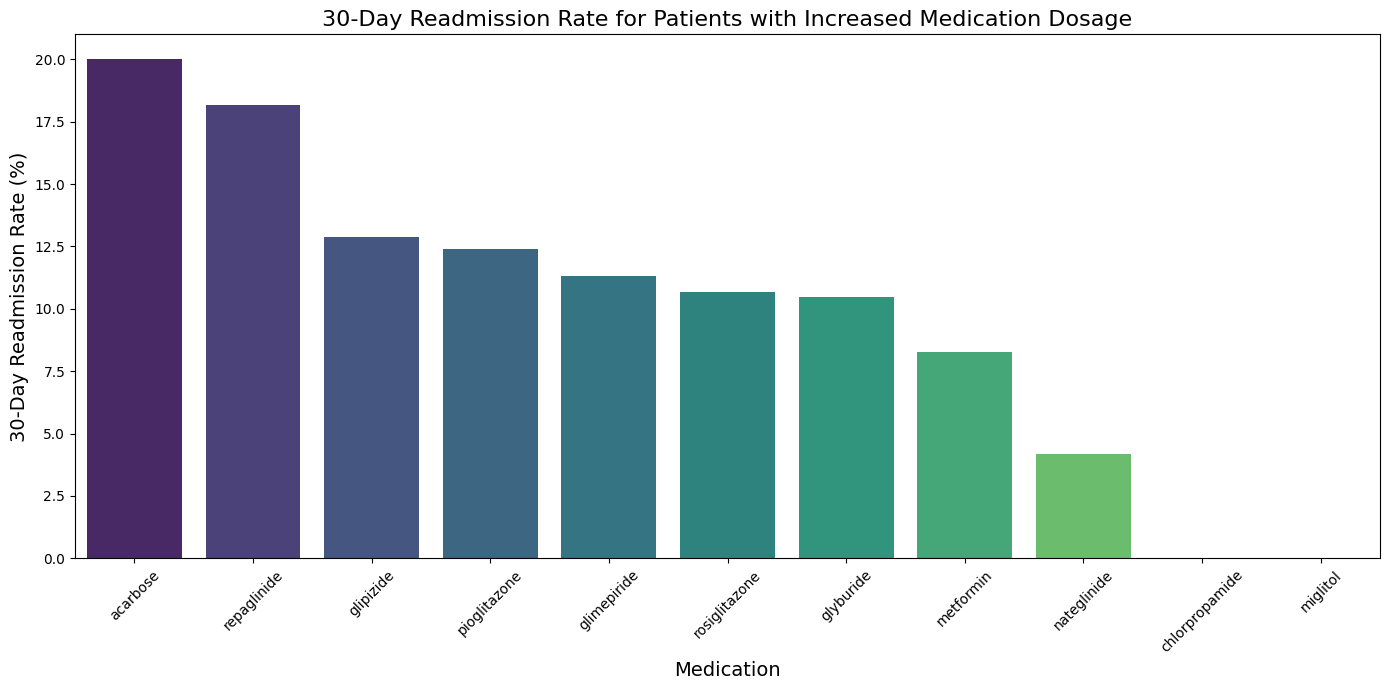

In [30]:
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'readmitted_binary']

med_readmission_rates = {}
for med in med_columns:
    # Filtering data for patients with increased dosage
    med_up_data = data[data[med] == 'Up']
    if len(med_up_data) > 0:
        # Calculating 30-day readmission rate
        med_readmission_rates[med] = (med_up_data['readmitted_binary'].mean() * 100).round(2)

# Creating a DataFrame for easier plotting
if med_readmission_rates:
    med_rates_df = pd.DataFrame(list(med_readmission_rates.items()), columns=['Medication', 'Readmission_Rate'])
    med_rates_df = med_rates_df.sort_values('Readmission_Rate', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Medication', y='Readmission_Rate', data=med_rates_df, palette='viridis')
    plt.title('30-Day Readmission Rate for Patients with Increased Medication Dosage', fontsize=16)
    plt.xlabel('Medication', fontsize=14)
    plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101742 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101742 non-null  object
 1   gender                    101742 non-null  object
 2   age                       101742 non-null  object
 3   admission_type_id         101742 non-null  object
 4   discharge_disposition_id  101742 non-null  object
 5   admission_source_id       101742 non-null  object
 6   time_in_hospital          101742 non-null  int64 
 7   payer_code                101742 non-null  object
 8   medical_specialty         101742 non-null  object
 9   num_lab_procedures        101742 non-null  int64 
 10  num_procedures            101742 non-null  int64 
 11  num_medications           101742 non-null  int64 
 12  number_outpatient         101742 non-null  int64 
 13  number_emergency          101742 non-null  int64 
 14  number_in

### Previous visists to readmitted column

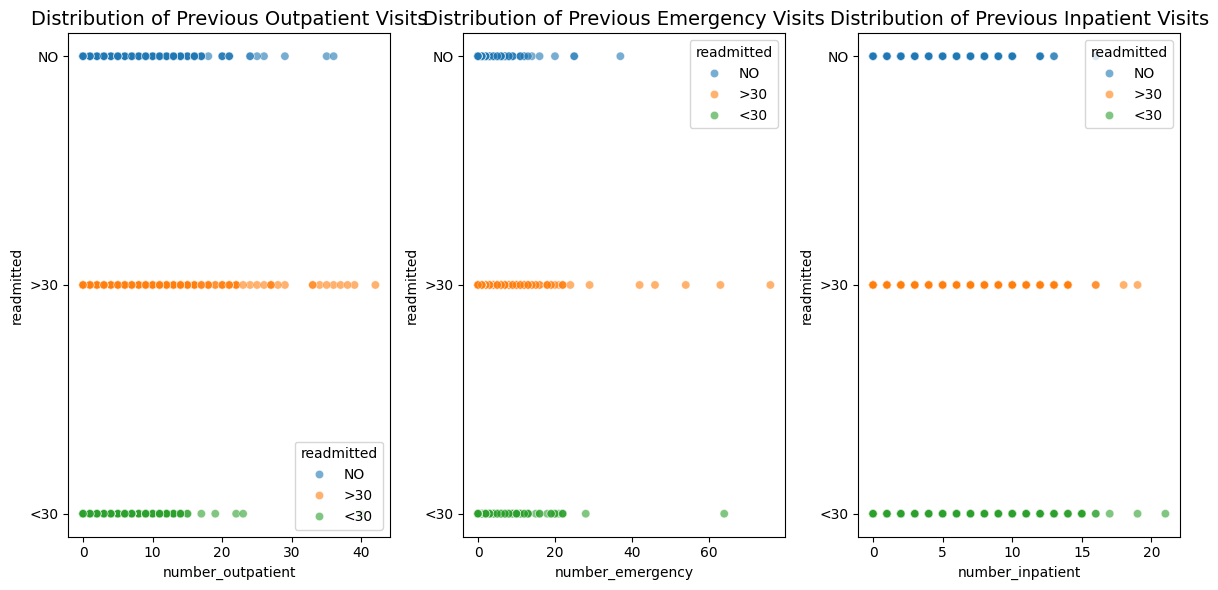

In [32]:

plt.figure(figsize=(12, 6))

# Scatter plot with readmitted status as color/hue
plt.subplot(1, 3, 1)
plt.title('Distribution of Previous Outpatient Visits', fontsize=14)
sns.scatterplot(x=data["number_outpatient"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)

# Scatter plot with readmitted status as color/hue
plt.subplot(1, 3, 2)
plt.title('Distribution of Previous Emergency Visits', fontsize=14)
sns.scatterplot(x=data["number_emergency"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)

plt.subplot(1, 3, 3)
plt.title('Distribution of Previous Inpatient Visits', fontsize=14)
sns.scatterplot(x=data["number_inpatient"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)


plt.tight_layout()
plt.show()

### Seeing the relation between the payer code and readmission

### Correlation matrix

In [33]:
'''readmitted_mapping = {
    '<30': '1',
    '>30': '2',
    'NO': "0"
}

data['readmitted_mapped'] = data['readmitted'].map(readmitted_mapping)'''

'readmitted_mapping = {\n    \'<30\': \'1\',\n    \'>30\': \'2\',\n    \'NO\': "0"\n}\n\ndata[\'readmitted_mapped\'] = data[\'readmitted\'].map(readmitted_mapping)'

In [34]:
'''ArithmeticError
# Selecting numerical features
numerical_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses', "readmitted_mapped"
]

# Creating correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
'''

'ArithmeticError\n# Selecting numerical features\nnumerical_features = [\n    \'time_in_hospital\', \'num_lab_procedures\', \'num_procedures\', \n    \'num_medications\', \'number_outpatient\', \'number_emergency\', \n    \'number_inpatient\', \'number_diagnoses\', "readmitted_mapped"\n]\n\n# Creating correlation matrix\ncorrelation_matrix = data[numerical_features].corr()\n\n# Plot heatmap of correlations\nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=\'.2f\', linewidths=0.5)\nplt.title(\'Correlation Matrix of Numerical Features\', fontsize=16)\nplt.tight_layout()\nplt.show()\n'

In [35]:
data = data[data['gender'].isin(['Male', 'Female'])]
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                  'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                  'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                  'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                  'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

# Calculate number of medications taken
data['num_medications_taken'] = data[medication_cols].apply(lambda x: (x != 'No').sum(), axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101742 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101742 non-null  object
 1   gender                    101742 non-null  object
 2   age                       101742 non-null  object
 3   admission_type_id         101742 non-null  object
 4   discharge_disposition_id  101742 non-null  object
 5   admission_source_id       101742 non-null  object
 6   time_in_hospital          101742 non-null  int64 
 7   payer_code                101742 non-null  object
 8   medical_specialty         101742 non-null  object
 9   num_lab_procedures        101742 non-null  int64 
 10  num_procedures            101742 non-null  int64 
 11  num_medications           101742 non-null  int64 
 12  number_outpatient         101742 non-null  int64 
 13  number_emergency          101742 non-null  int64 
 14  number_in

In [37]:
# Data Preprocessing: Encode features and standardize
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("age")

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [38]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,diag_category,num_medications_taken
0,2,0,[0-10),3,24,8,1,17,37,41,...,0,0,0,0,1,0,2,0,4,0
1,2,0,[10-20),1,1,2,3,17,72,59,...,0,0,0,0,0,1,1,0,4,0
2,0,0,[20-30),1,1,2,2,17,72,11,...,0,0,0,0,1,1,2,0,13,1
3,2,1,[30-40),1,1,2,2,17,72,44,...,0,0,0,0,0,1,2,0,7,0
4,2,1,[40-50),1,1,2,1,17,72,51,...,0,0,0,0,0,1,2,0,1,1


In [39]:
data["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [40]:
map_age = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}
data['age'] = data['age'].map(map_age)

In [41]:
# Standardize only the numeric columns, excluding one-hot encoded columns
scaler = StandardScaler()
# Define numeric columns that are not one-hot encoded
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses', 'num_medications_taken']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])



In [42]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,diag_category,num_medications_taken
0,2,0,0,3,24,8,-1.137623,17,37,-0.106603,...,0,0,0,0,1,0,2,0,4,-0.804956
1,2,0,1,1,1,2,-0.467669,17,72,0.808313,...,0,0,0,0,0,1,1,0,4,-0.804956
2,0,0,2,1,1,2,-0.802646,17,72,-1.631463,...,0,0,0,0,1,1,2,0,13,0.442555
3,2,1,3,1,1,2,-0.802646,17,72,0.045883,...,0,0,0,0,0,1,2,0,7,-0.804956
4,2,1,4,1,1,2,-1.137623,17,72,0.401683,...,0,0,0,0,0,1,2,0,1,0.442555


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101742 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101742 non-null  int64  
 1   gender                    101742 non-null  int64  
 2   age                       101742 non-null  int64  
 3   admission_type_id         101742 non-null  int64  
 4   discharge_disposition_id  101742 non-null  int64  
 5   admission_source_id       101742 non-null  int64  
 6   time_in_hospital          101742 non-null  float64
 7   payer_code                101742 non-null  int64  
 8   medical_specialty         101742 non-null  int64  
 9   num_lab_procedures        101742 non-null  float64
 10  num_procedures            101742 non-null  float64
 11  num_medications           101742 non-null  float64
 12  number_outpatient         101742 non-null  float64
 13  number_emergency          101742 non-null  float6

In [44]:
data.drop(columns=['readmitted_binary'], inplace=True)


In [ ]:
data.info()

In [299]:
'''readmitted_mapping = {
    '<30': '1',
    '>30': '2',
    'NO': "0"
}

readmitted_mapping = {
    '<30': '1',
    '>30': '0',
    'NO': "0"
}


data["readmitted"] = data["readmitted"].map(readmitted_mapping)

****pick the right mapping for your model****


'''




'readmitted_mapping = {\n    \'<30\': \'1\',\n    \'>30\': \'2\',\n    \'NO\': "0"\n}\n\nreadmitted_mapping = {\n    \'<30\': \'1\',\n    \'>30\': \'0\',\n    \'NO\': "0"\n}\n\n\ndata["readmitted"] = data["readmitted"].map(readmitted_mapping)\n\n****pick the right mapping for your model****\n\n\n'

In [45]:
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses', 'num_medications_taken']
mask = (data[numeric_cols] > -3) & (data[numeric_cols] < 3)
data = data[mask.all(axis=1)]



In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94452 entries, 1 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      94452 non-null  int64  
 1   gender                    94452 non-null  int64  
 2   age                       94452 non-null  int64  
 3   admission_type_id         94452 non-null  int64  
 4   discharge_disposition_id  94452 non-null  int64  
 5   admission_source_id       94452 non-null  int64  
 6   time_in_hospital          94452 non-null  float64
 7   payer_code                94452 non-null  int64  
 8   medical_specialty         94452 non-null  int64  
 9   num_lab_procedures        94452 non-null  float64
 10  num_procedures            94452 non-null  float64
 11  num_medications           94452 non-null  float64
 12  number_outpatient         94452 non-null  float64
 13  number_emergency          94452 non-null  float64
 14  number_inp